In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
news = pd.read_csv("/content/drive/MyDrive/DL Project/OnlineNewsPopularity.csv")
news

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [ ]:
news.keys()


Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [ ]:
desired_columns = [' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares' ]
new_news = news[desired_columns]

In [ ]:
new_news.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
new_news.isnull().sum()

,0
timedelta,0
n_tokens_title,0
n_tokens_content,0
n_unique_tokens,0
n_non_stop_words,0
n_non_stop_unique_tokens,0
num_hrefs,0
num_self_hrefs,0
num_imgs,0
num_videos,0


No columns with empty cells

In [ ]:
new_news.dtypes

,0
timedelta,float64
n_tokens_title,float64
n_tokens_content,float64
n_unique_tokens,float64
n_non_stop_words,float64
n_non_stop_unique_tokens,float64
num_hrefs,float64
num_self_hrefs,float64
num_imgs,float64
num_videos,float64


In [ ]:
new_news.columns = new_news.columns.str.strip()


categorical_columns = [
    'is_weekend', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
    'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
    'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world'
]


for col in categorical_columns:
    if col in new_news.columns:
        new_news[col] = new_news[col].astype('category')


new_news.dtypes


<ipython-input-9-32123454de75>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_news[col] = new_news[col].astype('category')


,0
timedelta,float64
n_tokens_title,float64
n_tokens_content,float64
n_unique_tokens,float64
n_non_stop_words,float64
n_non_stop_unique_tokens,float64
num_hrefs,float64
num_self_hrefs,float64
num_imgs,float64
num_videos,float64


In [ ]:
new_news.select_dtypes(include=['number'])

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [ ]:
new_news.select_dtypes(include=['category'])

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


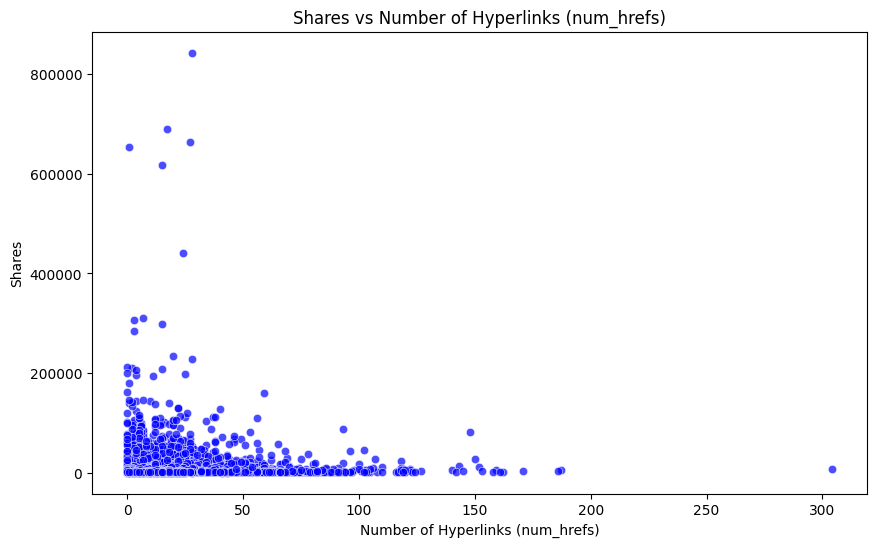

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=new_news['num_hrefs'], y=new_news['shares'], alpha=0.7, color='blue')
plt.title("Shares vs Number of Hyperlinks (num_hrefs)")
plt.xlabel("Number of Hyperlinks (num_hrefs)")
plt.ylabel("Shares")
plt.show()

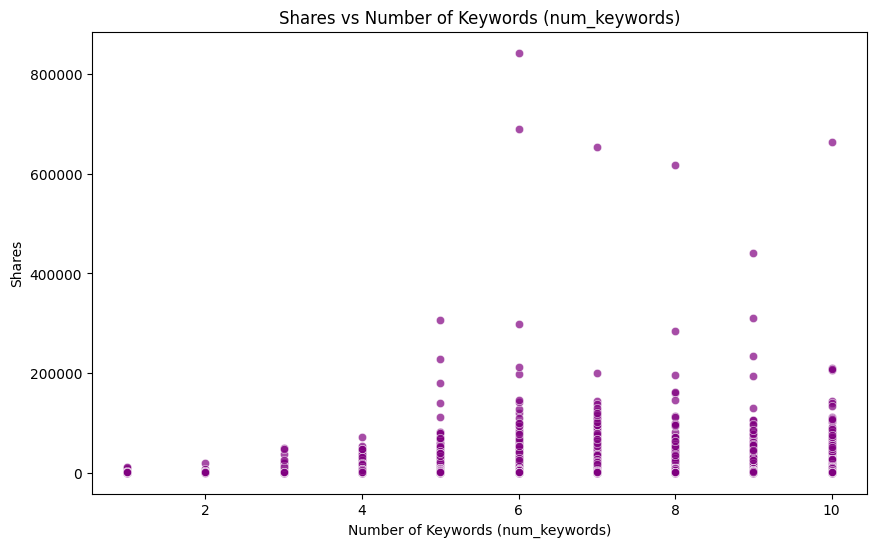

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=new_news['num_keywords'], y=new_news['shares'], alpha=0.7, color='purple')
plt.title("Shares vs Number of Keywords (num_keywords)")
plt.xlabel("Number of Keywords (num_keywords)")
plt.ylabel("Shares")
plt.show()

<ipython-input-14-a774e8c56e5c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_news[weekday_columns] = new_news[weekday_columns].apply(lambda col: col.cat.codes)


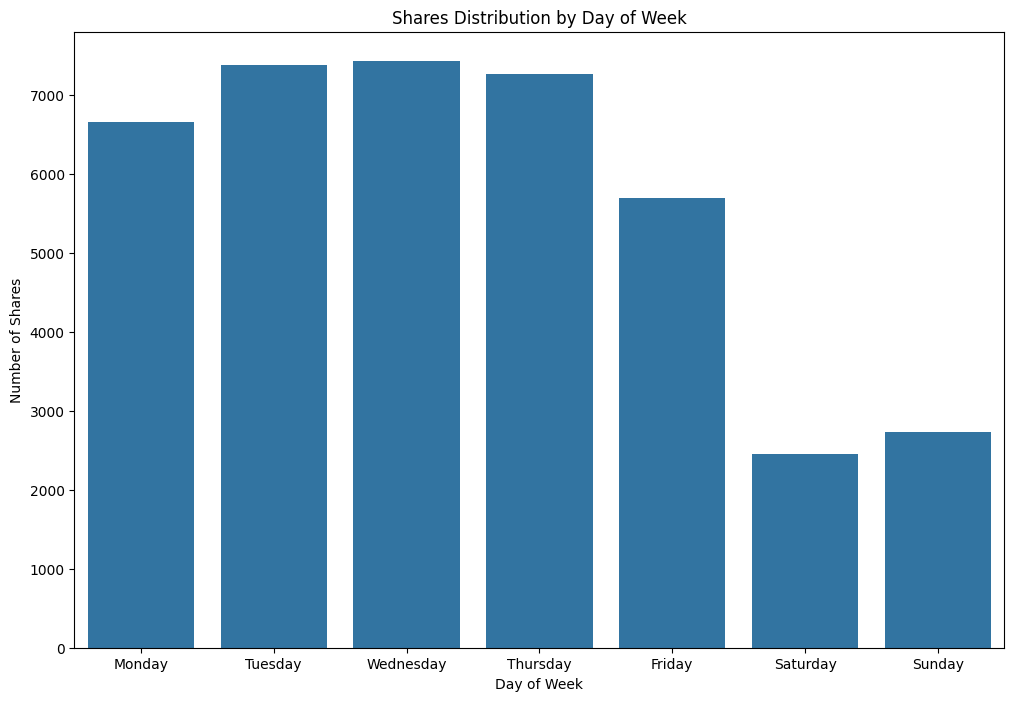

In [ ]:

weekday_columns = [
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
    'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
    'weekday_is_sunday'
]

new_news[weekday_columns] = new_news[weekday_columns].apply(lambda col: col.cat.codes)


weekday_sums = new_news[weekday_columns].sum(axis=0)

#  barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], y=weekday_sums)
plt.title("Shares Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Shares")
plt.show()

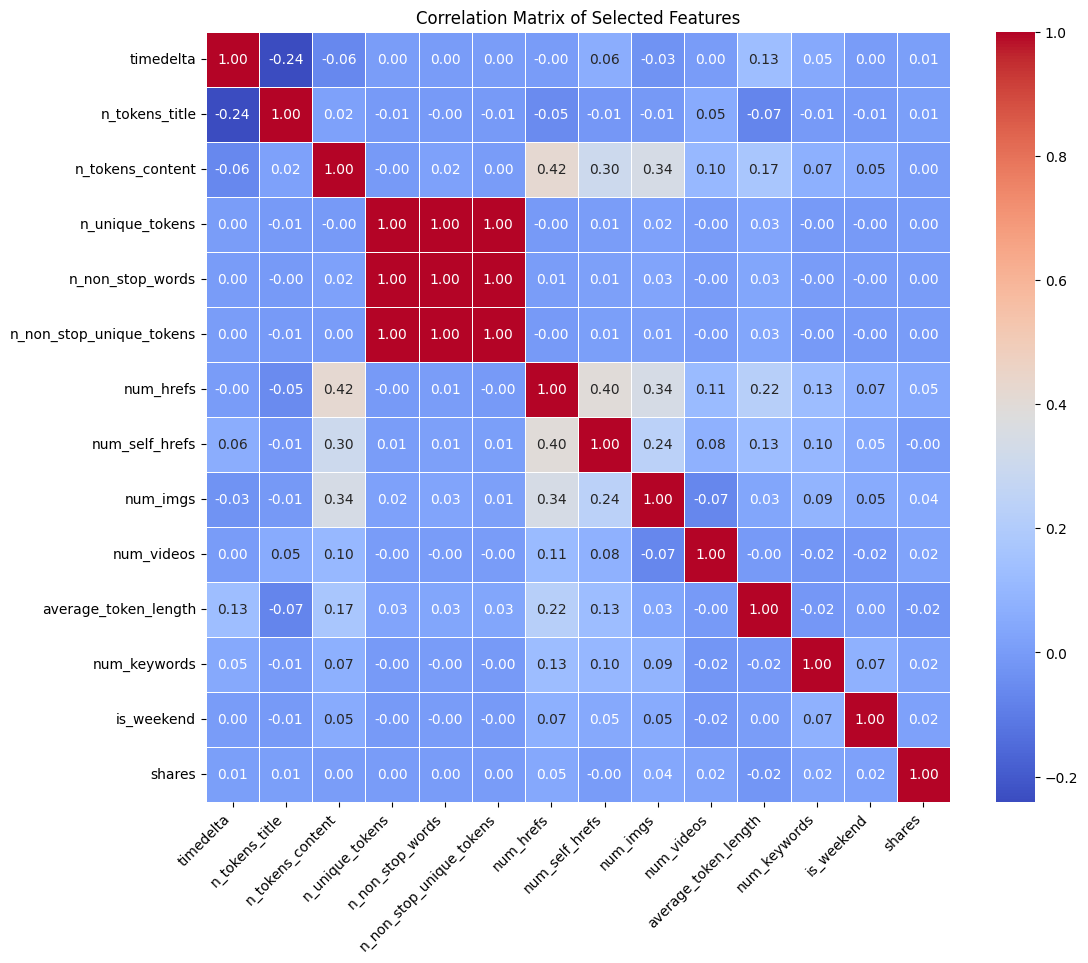

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_columns = [
    'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
    'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
    'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
    'num_keywords', 'is_weekend', 'shares'
]
correlation_matrix = new_news[correlation_columns].corr()


plt.figure(figsize=(12, 10))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


plt.title("Correlation Matrix of Selected Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


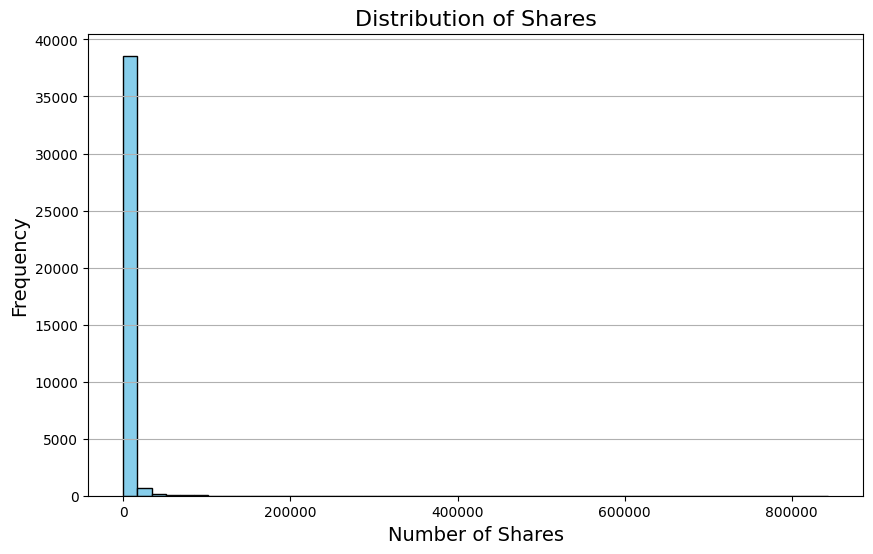

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(new_news['shares'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Shares', fontsize=16)
plt.xlabel('Number of Shares', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.show()

to avoid miscalculation

Filtering data to Avoid extrme outliers

In [ ]:
# filtering
threshold = 150000

fltr_new_news = new_news[new_news['shares'] <= threshold]


print(f"Original dataset shape: {new_news.shape}")
print(f"Filtered dataset shape: {fltr_new_news.shape}")


print(fltr_new_news['shares'].describe())


Original dataset shape: (39644, 60)
Filtered dataset shape: (39621, 60)
count     39621.000000
mean       3203.148633
std        6922.473546
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      145500.000000
Name: shares, dtype: float64


Removing un wanted colloumns

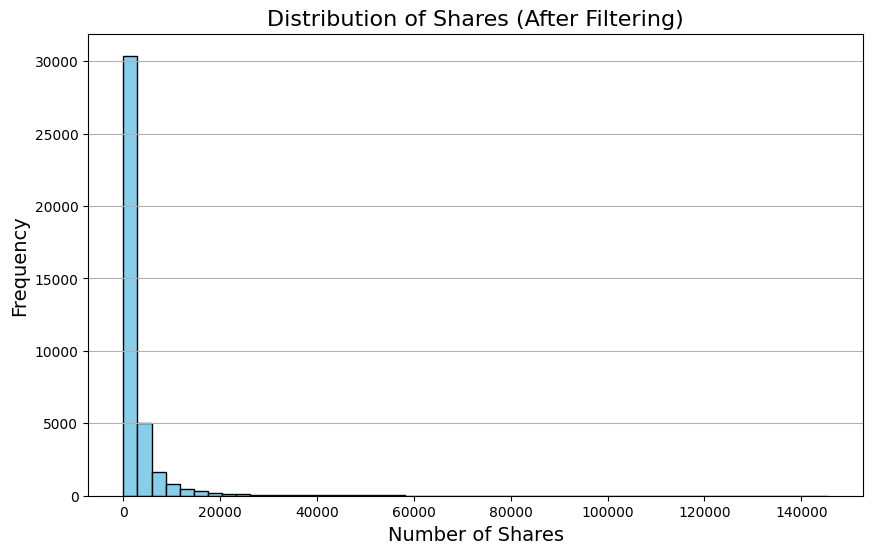

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(fltr_new_news['shares'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Shares (After Filtering)', fontsize=16)
plt.xlabel('Number of Shares', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.show()

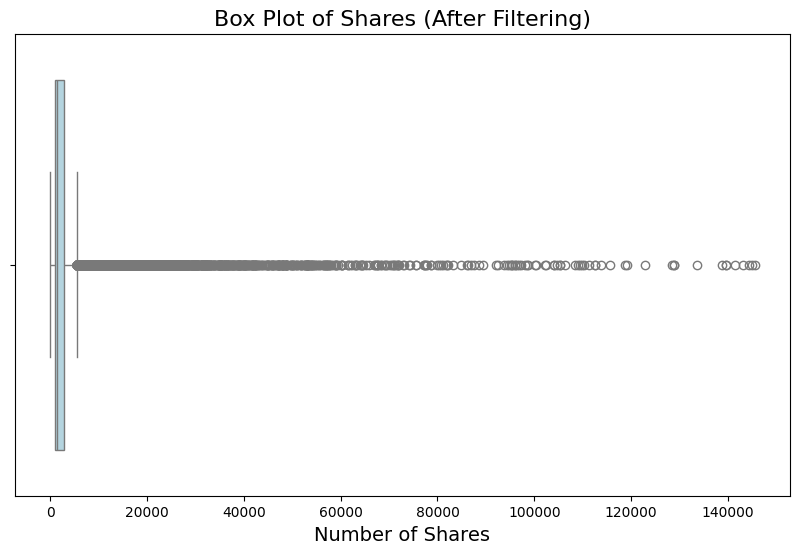

In [ ]:
import seaborn as sns

# Plot boxplot for 'shares'
plt.figure(figsize=(10, 6))
sns.boxplot(x=fltr_new_news['shares'], color='lightblue')
plt.title('Box Plot of Shares (After Filtering)', fontsize=16)
plt.xlabel('Number of Shares', fontsize=14)
plt.show()


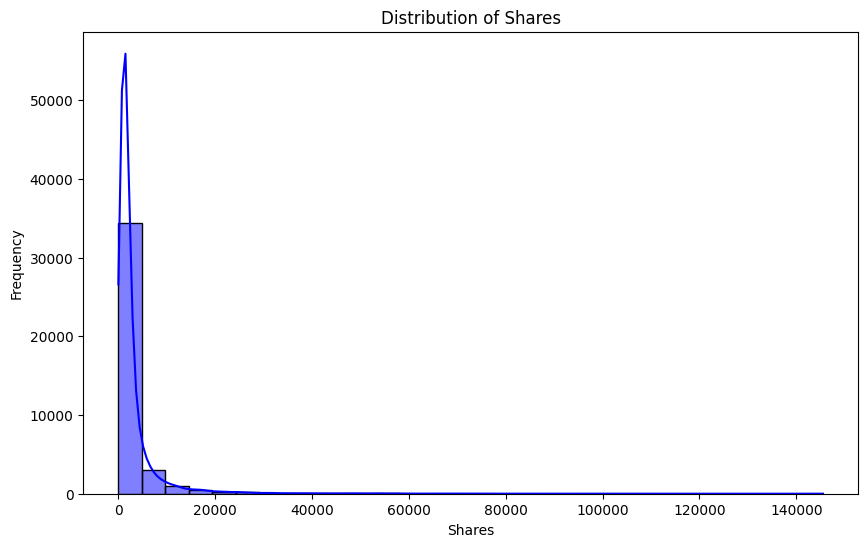

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(fltr_new_news['shares'], kde=True, bins=30, color='blue')
plt.title("Distribution of Shares")
plt.xlabel("Shares")
plt.ylabel("Frequency")
plt.show()

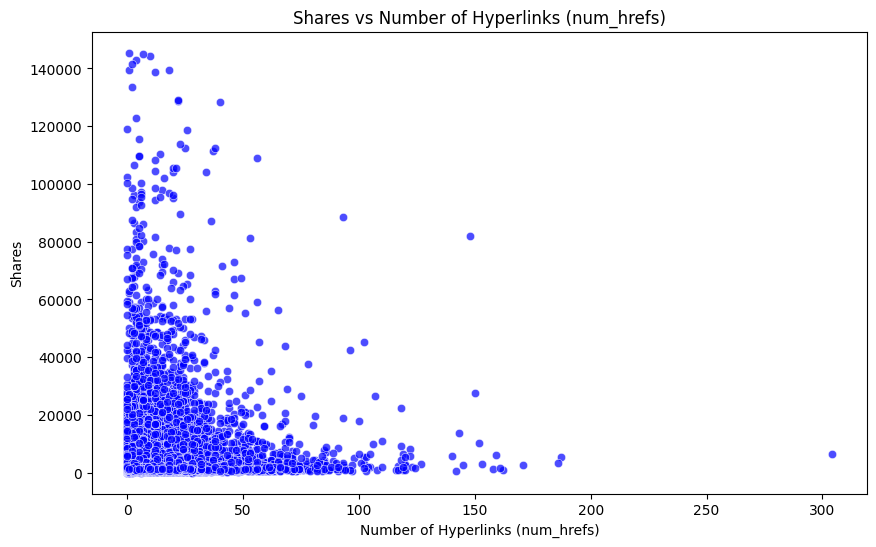

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fltr_new_news['num_hrefs'], y=fltr_new_news['shares'], alpha=0.7, color='blue')
plt.title("Shares vs Number of Hyperlinks (num_hrefs)")
plt.xlabel("Number of Hyperlinks (num_hrefs)")
plt.ylabel("Shares")
plt.show()

<ipython-input-22-5d6559c0542a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], y=weekday_sums.values, palette='viridis')


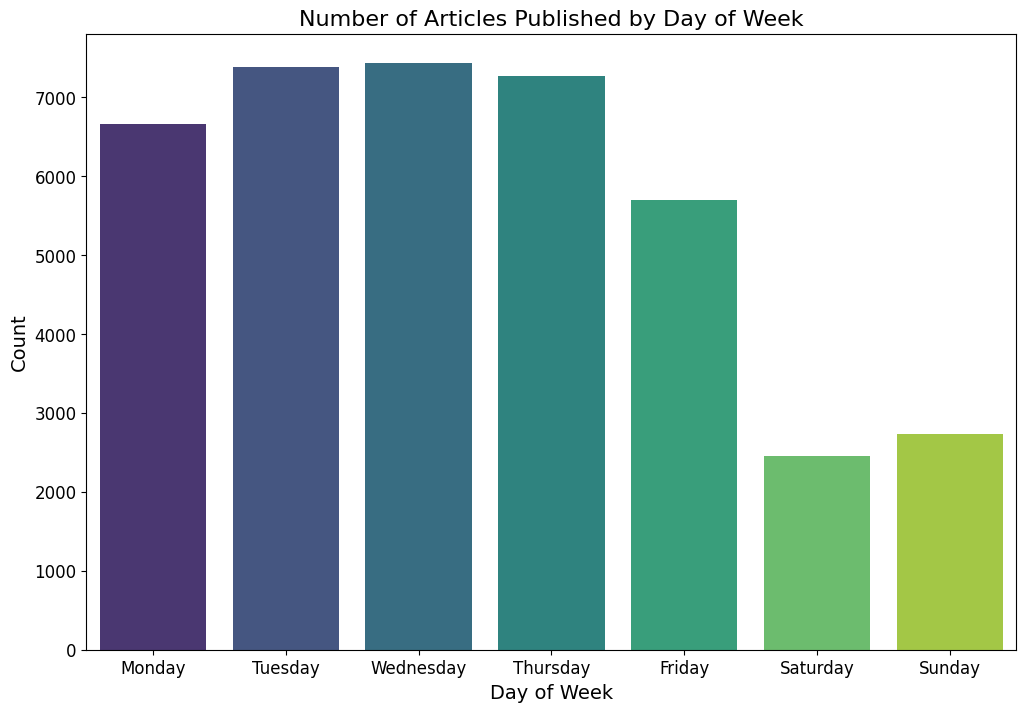

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of weekday columns
weekday_columns = [
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
    'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
    'weekday_is_sunday'
]

# Sum the shares grouped by weekday
weekday_sums = fltr_new_news[weekday_columns].sum(axis=0)

# Create a barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], y=weekday_sums.values, palette='viridis')
plt.title("Number of Articles Published by Day of Week", fontsize=16)
plt.xlabel("Day of Week", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


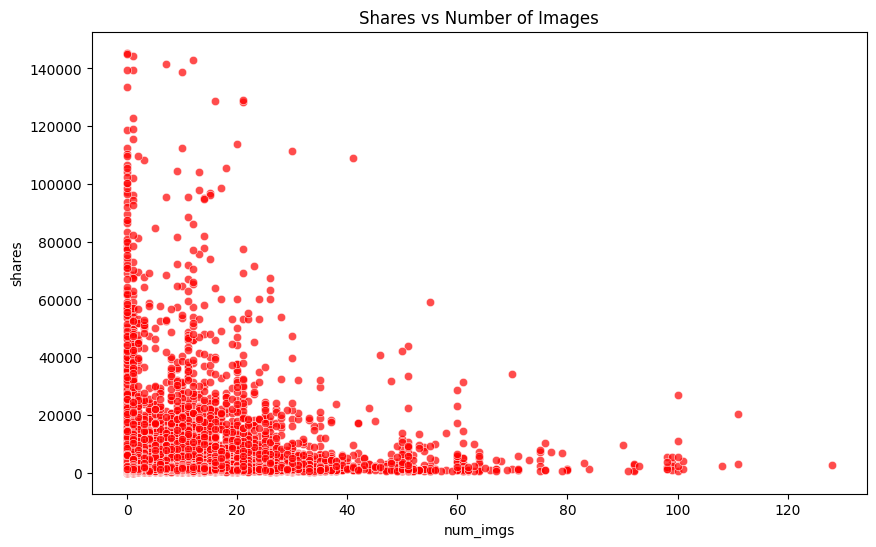

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fltr_new_news['num_imgs'], y=fltr_new_news['shares'], alpha=0.7, color='red')
plt.title("Shares vs Number of Images")
plt.show()

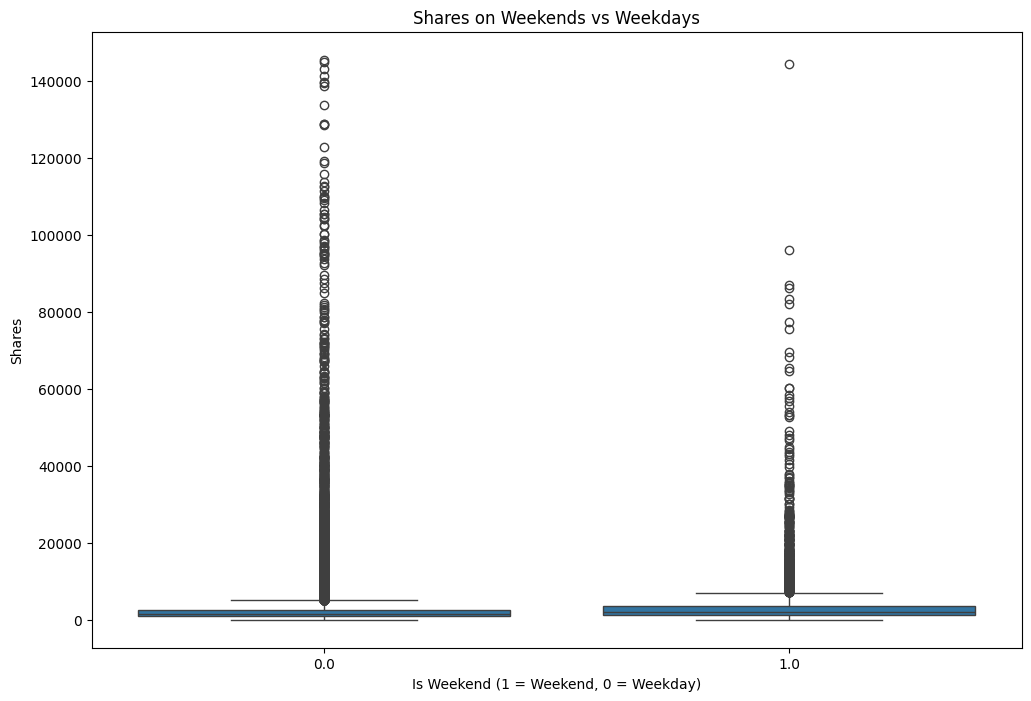

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_weekend', y='shares', data=fltr_new_news)
plt.title("Shares on Weekends vs Weekdays")
plt.xlabel("Is Weekend (1 = Weekend, 0 = Weekday)")
plt.ylabel("Shares")
plt.show()


Applying correlation analysis between numerical data

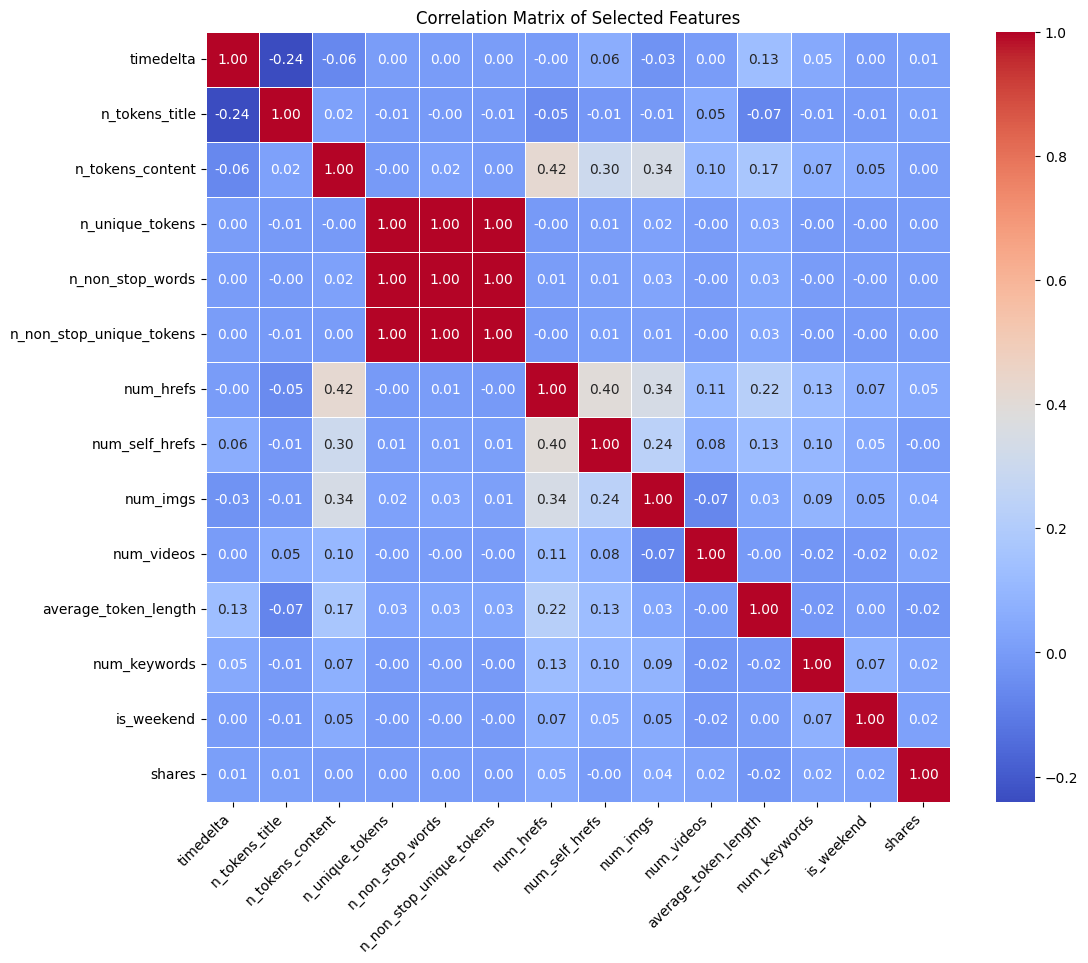

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the selected columns
correlation_columns = [
    'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
    'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
    'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
    'num_keywords', 'is_weekend', 'shares'
]
correlation_matrix = new_news[correlation_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


plt.title("Correlation Matrix of Selected Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


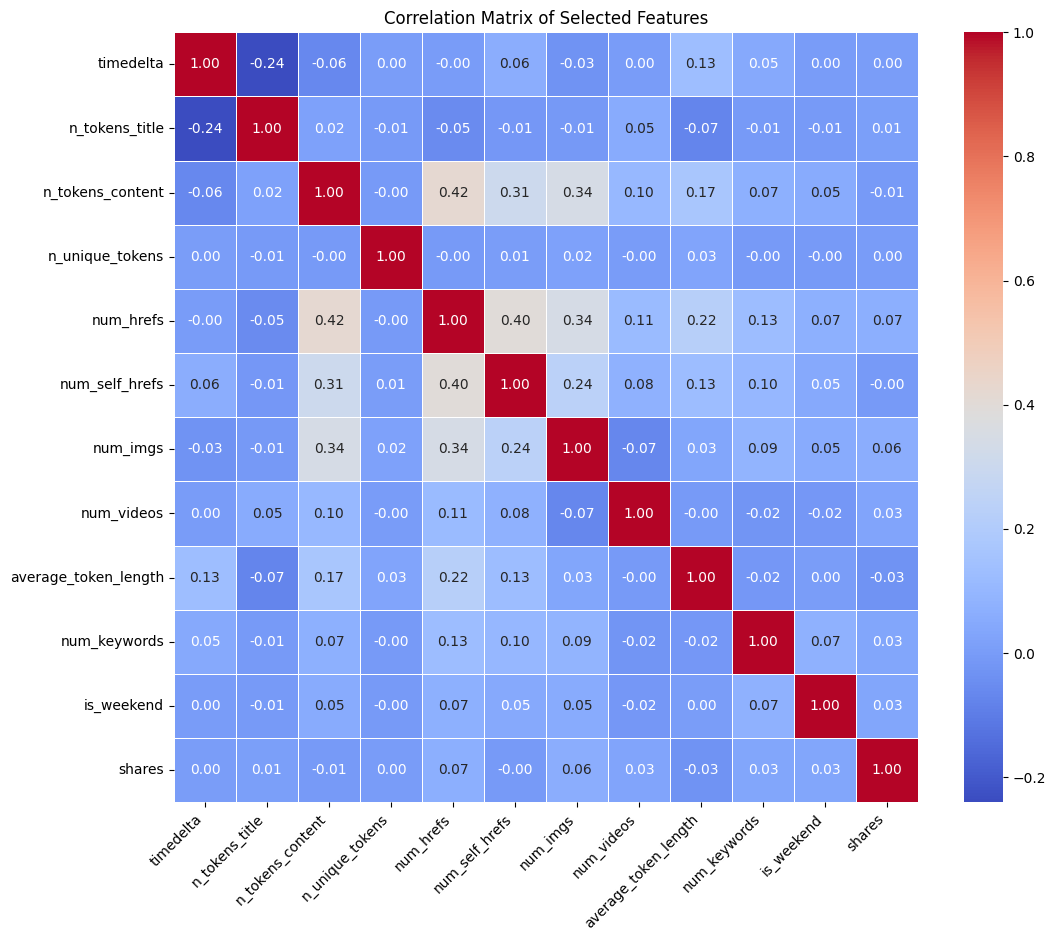

In [ ]:
correlation_columns = [
    'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
    'num_hrefs',
    'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
    'num_keywords', 'is_weekend', 'shares'
]
correlation_matrix = fltr_new_news[correlation_columns].corr()


plt.figure(figsize=(12, 10))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


plt.title("Correlation Matrix of Selected Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

'n_unique_tokens',
    'n_non_stop_words', 'n_non_stop_unique_tokens' two are removed among three as they are simmilar